In [1]:
import numpy as np
        import matplotlib.pyplot as plt

In [37]:
def exponential_decay(x):
    return np.exp(-(x ** 2))

In [69]:
c = 1
a = 5

def logistic_decay(x):
    return [c / (1 + a * np.exp(-i)) for i in x]

In [84]:
task_1_range = np.linspace(0, 10000, 500001)

In [71]:
def plot(x, y):
    fig = plt.figure()
    plt.plot(x, y)
    fig.show()

In [72]:
def log_plot(x, y):
    fig = plt.figure()
    plt.plot(x, np.log10(y))
    fig.show()

<ipython-input-71-b5e7c92db964>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


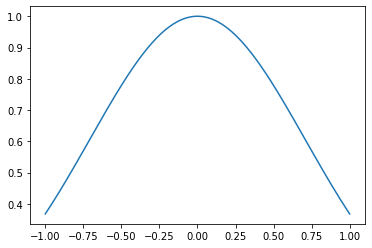

In [73]:
plot(task_1_range, exponential_decay(task_1_range))

<ipython-input-72-bb0800b99bd9>:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x, np.log10(y))
<ipython-input-72-bb0800b99bd9>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


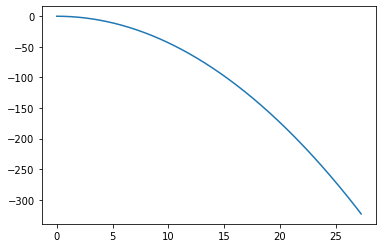

In [85]:
log_plot(task_1_range, exponential_decay(task_1_range))

<ipython-input-71-b5e7c92db964>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


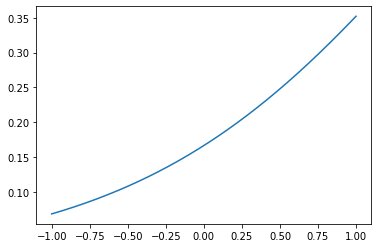

In [75]:
plot(task_1_range, logistic_decay(task_1_range))

<ipython-input-72-bb0800b99bd9>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


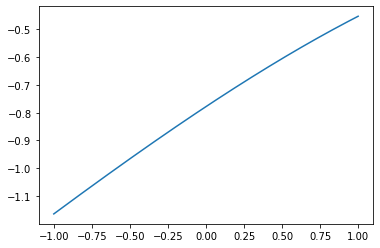

In [76]:
log_plot(task_1_range, logistic_decay(task_1_range))

<ipython-input-71-b5e7c92db964>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


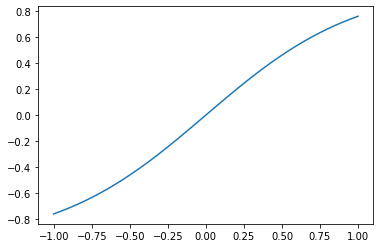

In [83]:
plot(task_1_range, np.tanh(task_1_range))

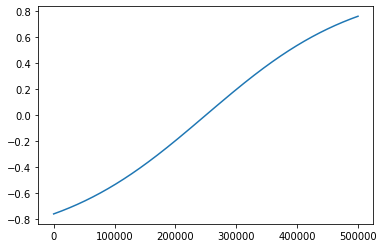

In [80]:
plt.plot(range(len(np.tanh(task_1_range))), np.tanh(task_1_range))

In [86]:
import os
import pandas as pd

In [87]:
path = "/Users/sebastianlee/Dropbox/Documents/Research/Projects/catastrophic/run/results/fig_3_expanded/"

In [88]:
df = pd.read_csv(os.path.join(path, "v_1.0", "0", "ode_log.csv"))

In [90]:
error_0 = np.array(df["log_generalisation_error_0"])
error_1 = np.array(df["log_generalisation_error_1"])

<ipython-input-265-ccfafc9d7df5>:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


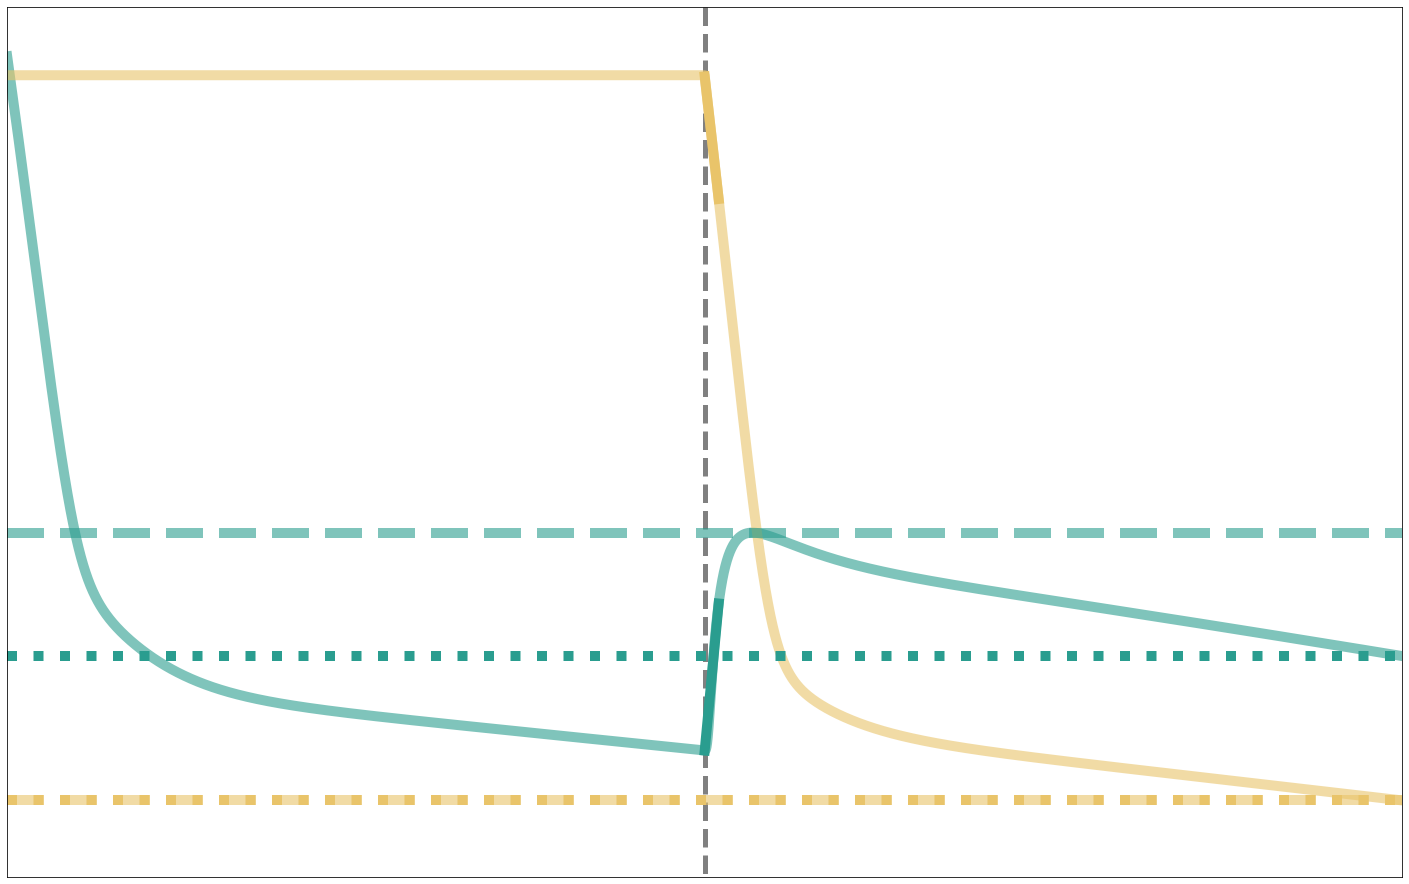

In [265]:
N=10000
elong = 1
scale_0 = 1
scale_1 = 1.15
switch = 5000

linew = 10

fig = plt.figure(figsize=(25,16))


# task boundary
plt.plot([switch, switch], [-0.5, -5.5], linestyle='dashed', color='gray', linewidth=5)

plt.plot(elong * np.arange(len(error_0))[:N], scale_0 * error_0[:N], linewidth=linew, c="#2A9D8F", alpha=0.6)
plt.plot(elong * np.arange(len(error_1))[:N], scale_1 * error_1[:N], linewidth=linew, c="#E9C46A", alpha=0.6)

# max forgetting
plt.plot([0, elong*N], [scale_0 * np.amax(error_0[switch:]), scale_0 * np.amax(error_0[switch:])], linestyle="dashed", linewidth=linew, c="#2A9D8F", alpha=0.6)

# max transfer
plt.plot([0, elong*N], [scale_1 * np.amin(error_1[switch:N]), scale_1 * np.amin(error_1[switch:N])], linestyle="dashed", linewidth=linew, c="#E9C46A", alpha=0.6)

# forgetting rate
arrow_length = 100
sample_size = 100
switch_error_0 = error_0[switch]
rate = np.mean([error_0[switch + i + 1] - error_0[switch + i] for i in range(sample_size)])
plt.plot([switch, switch+arrow_length], [switch_error_0, switch_error_0 + rate * arrow_length], linewidth=linew, c="#2A9D8F")

# transfer rate
arrow_length_1 = 100
sample_size_1 = 100
switch_error_1 = scale_1 * error_1[switch]
rate_1 = np.mean([scale_1 * error_1[switch + i + 1] - scale_1 * error_1[switch + i] for i in range(sample_size_1)])
plt.plot([switch, switch+arrow_length_1], [switch_error_1, switch_error_1 + rate_1 * arrow_length_1], linewidth=linew, c="#E9C46A")
# print(rate_1)
# plt.arrow(switch+arrow_length_1/2, switch_error_1+rate_1 * arrow_length_1/2, 5, 5*rate_1, linewidth=5, color="#E9C46A", shape='full', head_width=0.2, head_length=10, length_includes_head=True)

# final forgetting
plt.plot([0, elong*N], [scale_0 * error_0[N-1], scale_0 * error_0[N-1]], linestyle="dotted", linewidth=linew, c="#2A9D8F")

# final transfer
plt.plot([0, elong*N], [scale_1 * error_1[N-1], scale_1 * error_1[N-1]], linestyle="dotted", linewidth=linew, c="#E9C46A")

plt.xlim(0, N)
plt.ylim(-5.5, -0.5)

plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 

fig.show()
fig.savefig("schematic_boundary.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

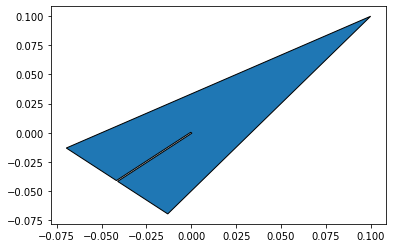

In [234]:
plt.arrow(0, 0, 0.1, 0.1, length_includes_head=True,
          head_width=0.08, head_length=0.2)

In [95]:
np.amax(error_0[5000:])

-3.521444225063081